In [1]:
#imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import model_selection


print(tf.__version__)


2.15.0


In [2]:
#import data
train_dir = './asl_alphabet_train'
test_dir = './asl_alphabet_test'


In [3]:
#get data
def get_data(dir):
    images = []
    labels = []
    dir_list = os.listdir(dir)
    for index, letter_dir in enumerate(dir_list):
        print("Getting images of", letter_dir)
        for file in os.listdir(dir + '/' + letter_dir):
            filepath = dir + '/' + letter_dir + '/' + file
            image = cv2.resize(cv2.imread(filepath), (32, 32))
            images.append(image)
            labels.append(index)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

In [4]:
X, y = get_data(train_dir)

Getting images of A
Getting images of B
Getting images of C
Getting images of D
Getting images of del
Getting images of E
Getting images of F
Getting images of G
Getting images of H
Getting images of I
Getting images of J
Getting images of K
Getting images of L
Getting images of M
Getting images of N
Getting images of nothing
Getting images of O
Getting images of P
Getting images of Q
Getting images of R
Getting images of S
Getting images of space
Getting images of T
Getting images of U
Getting images of V
Getting images of W
Getting images of X
Getting images of Y
Getting images of Z


In [5]:
# classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
#            'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
#            'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
# print(len(classes))

In [6]:
print("X shape:", X.shape)
print("y length:", len(y))


X shape: (87000, 32, 32, 3)
y length: 87000


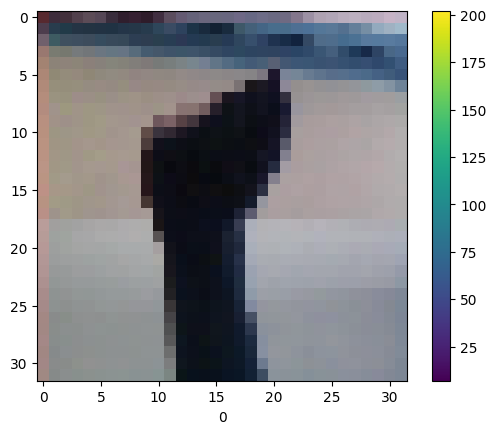

In [27]:
plt.Figure()
plt.imshow(X[0])
plt.colorbar()
plt.xlabel(y[0])
plt.show()

In [14]:
#preprocess data
def preprocess_data(X, y):
    # normalize the rgb values, our filter should have 3 channels, red, green, blue. that has a range of 0-255
    # if we want to feed it in to the neural network we should noramlize it to a value between 0-1 by dividing by 255
    normalized_X = X/255.0
    # normalized_X = X.astype('float32')/255.0
    # our input set is encoded as the following (labels) A, B, C = 0, 1, 2
    # however keras doesn't accept this encoding so we must convert our array of labels y into a 2d array 
    # where each column in a row corresponds to an int, and if the label corresponds to that int a 1 will go in that column, 0 if not
    # this is called hot encoding
    label_encoded_y = tf.keras.utils.to_categorical(y)
    #label_encoded_y = y
    
    #split X and y further into train and testing sets
    X_train, X_test, y_train, y_test = model_selection.train_test_split(normalized_X, label_encoded_y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = preprocess_data(X, y)
print("X_train:",X_train.shape)
print("X_test:", X_test.shape)
print("y_train[0]:",y_train[0])
print("y_train length:", len(y_train))

X_train: (69600, 32, 32, 3)
X_test: (17400, 32, 32, 3)
y_train[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
y_train length: 69600


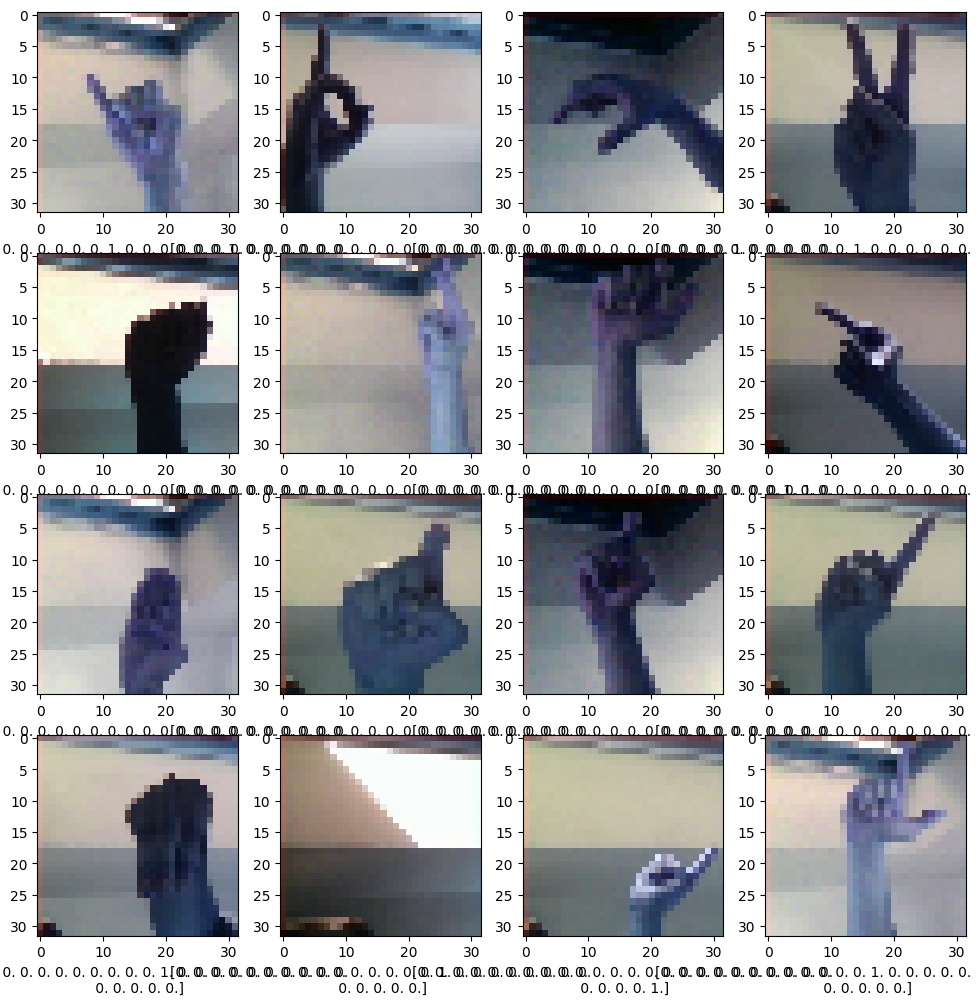

In [26]:
#10 inch by 10 inch figure
plt.figure(figsize=(12,12))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

In [28]:
#build model
from keras import models, layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(29))
model.summary()
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(29)
# ])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 7200)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                460864    
                                                                 
 dense_9 (Dense)             (None, 29)                1885      
                                                                 
Total params: 463645 (1.77 MB)
Trainable params: 463645 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [29]:
#compile model
model.compile(optimizer='adam',
            loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [30]:
#train model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
2175/2175 [==============================] - 43s 17ms/step - loss: 1.9264 - accuracy: 0.4158
Epoch 2/5
2175/2175 [==============================] - 33s 15ms/step - loss: 0.9153 - accuracy: 0.7037
Epoch 3/5
2175/2175 [==============================] - 30s 14ms/step - loss: 0.6426 - accuracy: 0.7895
Epoch 4/5
2175/2175 [==============================] - 31s 14ms/step - loss: 0.4992 - accuracy: 0.8373
Epoch 5/5
2175/2175 [==============================] - 35s 16ms/step - loss: 0.4103 - accuracy: 0.8665


In [31]:
#evaluate accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

544/544 - 5s - loss: 0.4529 - accuracy: 0.8434 - 5s/epoch - 8ms/step
Test accuracy: 0.843448281288147
Test loss: 0.4528619647026062
